In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis


In [2]:
wine = load_wine()
X = wine.data
y = wine.target

# 1

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN (k=5): {acc_knn:.4f}")

Accuracy of KNN (k=5): 0.7407


# 2

In [6]:

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_knn_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of KNN after PCA (3 components): {acc_knn_pca:.4f}")

Accuracy of KNN after PCA (3 components): 0.7407


# 3

In [8]:
def rule_based_classifier(alcohol):
    if alcohol < 12:
        return 0
    elif 12 <= alcohol <= 13:
        return 1
    else:
        return 2

# ویژگی Alcohol (اولین ویژگی در دیتاست)
X_test_alcohol = X_test[:, 0]
y_pred_rule = [rule_based_classifier(val) for val in X_test_alcohol]

In [9]:
acc_rule = accuracy_score(y_test, y_pred_rule)
print(f"Accuracy of Rule-Based Classifier: {acc_rule:.4f}")
print(f"KNN Accuracy: {acc_knn:.4f}")
print(f"Difference: {acc_knn - acc_rule:.4f}")

Accuracy of Rule-Based Classifier: 0.4815
KNN Accuracy: 0.7407
Difference: 0.2593


In [10]:

# لیست معیارهای فاصله (به جز Mahalanobis)
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'cosine']
accuracies = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=4, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[metric] = acc
    print(f"Accuracy with {metric}: {acc:.4f}")

# تعریف فاصله Mahalanobis (نیاز به ماتریس کوواریانس معکوس دارد)

# محاسبه ماتریس کوواریانس معکوس روی داده‌های آموزش
cov_matrix = np.cov(X_train, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

def mahalanobis_distance(x, y):
    return mahalanobis(x, y, inv_cov_matrix)

# استفاده از فاصله Mahalanobis در KNN
knn_mah = KNeighborsClassifier(n_neighbors=3, metric=mahalanobis_distance)
knn_mah.fit(X_train, y_train)
y_pred_mah = knn_mah.predict(X_test)
acc_mah = accuracy_score(y_test, y_pred_mah)
accuracies['mahalanobis'] = acc_mah
print(f"Accuracy with Mahalanobis: {acc_mah:.4f}")

# نمایش همه دقت‌ها
print("\nAll accuracies:")
for metric, acc in accuracies.items():
    print(f"{metric}: {acc:.4f}")

Accuracy with euclidean: 0.7222
Accuracy with manhattan: 0.7407
Accuracy with chebyshev: 0.7222
Accuracy with cosine: 0.7778
Accuracy with Mahalanobis: 0.9074

All accuracies:
euclidean: 0.7222
manhattan: 0.7407
chebyshev: 0.7222
cosine: 0.7778
mahalanobis: 0.9074


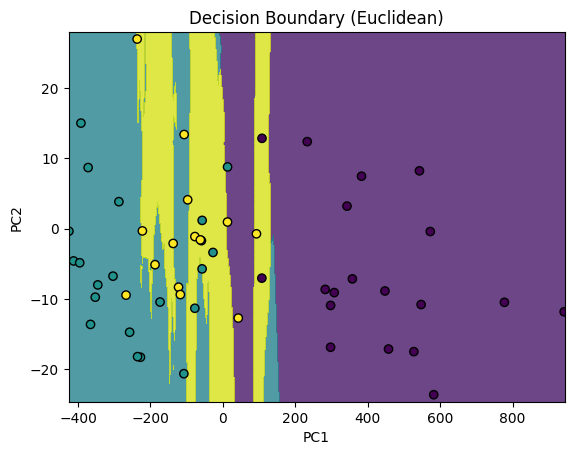

In [13]:
# فقط برای نمایش 2 مؤلفه اول
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# مثال برای Euclidean
knn_euclidean = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn_euclidean.fit(X_train_pca_2, y_train)
plot_decision_boundary(knn_euclidean, X_test_pca_2, y_test, "Decision Boundary (Euclidean)")

# 5

Accuracy with Soft Encoding: 0.9444


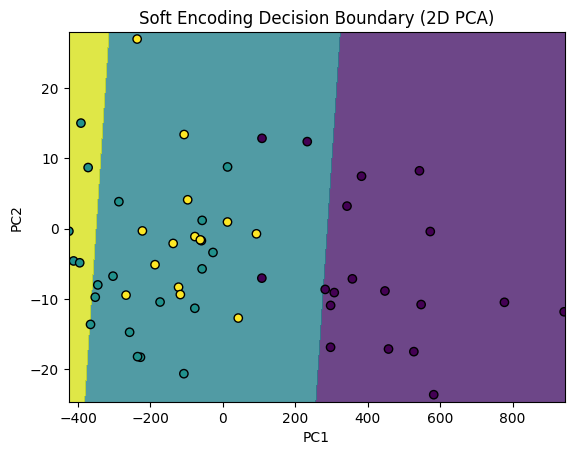


تحلیل:
- Soft Encoding می‌تواند برای داده‌های ترتیبی مفید باشد، اما در اینجا
  ممکن است باعث پیش‌بینی بیش‌ازحد کلاس میانی شود زیرا مدل رگرسیون
  خطی برای کلاس‌بندی چندکلاسه بهینه نیست.
- همچنین تبدیل مقادیر پیوسته به کلاس‌های گسسته ممکن است
  اطلاعات را از دست بدهد.


In [21]:
# قسمت ۵: Soft Encoding (Classification-as-Regression)

# 1. تبدیل کلاس‌ها به مقادیر پیوسته
y_train_soft = np.where(y_train == 0, 0, np.where(y_train == 1, 0.5, 1))
y_test_soft = np.where(y_test == 0, 0, np.where(y_test == 1, 0.5, 1))

# 2. آموزش مدل رگرسیون خطی
lr = LinearRegression()
lr.fit(X_train, y_train_soft)
y_pred_soft = lr.predict(X_test)

# 3. تبدیل خروجی پیوسته به کلاس‌های گسسته
def soft_to_class(y_soft):
    # تبدیل مقادیر پیوسته به نزدیک‌ترین کلاس
    y_class = []
    for val in y_soft:
        if val < 0.25:
            y_class.append(0)  # کلاس 0
        elif val < 0.75:
            y_class.append(1)  # کلاس 1 (میانی)
        else:
            y_class.append(2)  # کلاس 2
    return np.array(y_class)

y_pred_class = soft_to_class(y_pred_soft)
y_test_class = soft_to_class(y_test_soft)

# 4. محاسبه دقت
acc_soft = accuracy_score(y_test, y_pred_class)  # استفاده از y_test اصلی (کلاس‌های صحیح)
print(f"Accuracy with Soft Encoding: {acc_soft:.4f}")

# 5. کاهش ابعاد با PCA و رسم Decision Boundary
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)

# آموزش مدل روی داده‌های کاهش‌یافته
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca_2, y_train_soft)
y_pred_pca_soft = lr_pca.predict(X_test_pca_2)
y_pred_pca_class = soft_to_class(y_pred_pca_soft)

# رسم Decision Boundary
def plot_soft_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # پیش‌بینی برای نقاط مش
    Z_soft = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_class = soft_to_class(Z_soft)
    Z_class = Z_class.reshape(xx.shape)

    plt.contourf(xx, yy, Z_class, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

plot_soft_boundary(lr_pca, X_test_pca_2, y_test, "Soft Encoding Decision Boundary (2D PCA)")

# 6. تحلیل نتایج
print("\nتحلیل:")
print("- Soft Encoding می‌تواند برای داده‌های ترتیبی مفید باشد، اما در اینجا")
print("  ممکن است باعث پیش‌بینی بیش‌ازحد کلاس میانی شود زیرا مدل رگرسیون")
print("  خطی برای کلاس‌بندی چندکلاسه بهینه نیست.")
print("- همچنین تبدیل مقادیر پیوسته به کلاس‌های گسسته ممکن است")
print("  اطلاعات را از دست بدهد.")

In [14]:
y_train_soft = np.where(y_train == 0, 0, np.where(y_train == 1, 0.5, 1))
y_test_soft = np.where(y_test == 0, 0, np.where(y_test == 1, 0.5, 1))

In [15]:

lr = LinearRegression()
lr.fit(X_train, y_train_soft)
y_pred_soft = lr.predict(X_test)

In [16]:
def soft_to_class(y_soft):
    classes = [0, 0.5, 1]
    return [min(classes, key=lambda x: abs(x - val)) for val in y_soft]

y_pred_class = soft_to_class(y_pred_soft)

y_test_class = soft_to_class(y_test_soft)

In [20]:
print(y_test_class)
print(y_pred_class)
acc_soft = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy with Soft Encoding: {acc_soft}")

[0, 0, 1, 0, 0.5, 0, 0.5, 1, 0.5, 1, 0, 1, 0, 0.5, 0, 0.5, 0.5, 0.5, 0, 0.5, 0, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 0.5, 0, 0, 0.5, 1, 0, 0, 0, 1, 1, 0.5, 1, 0, 0.5, 0.5, 0.5, 1, 0, 0.5, 0.5, 1, 0, 0.5, 0, 0, 1]
[0, 0, 1, 0, 0.5, 0, 0.5, 1, 0, 0.5, 0, 1, 0, 0.5, 0, 0.5, 0.5, 0.5, 0, 0.5, 0, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 1, 0, 0, 0, 1, 1, 0.5, 1, 0, 0.5, 0.5, 0.5, 1, 0, 0.5, 0.5, 1, 0, 0.5, 0, 0, 1]


ValueError: continuous is not supported

In [ ]:
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca_2, y_train_soft)
y_pred_pca_soft = lr_pca.predict(X_test_pca_2)
y_pred_pca_class = soft_to_class(y_pred_pca_soft)

# رسم Decision Boundary
def plot_soft_boundary(X, y_pred, y_test, title):
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6, label='Predicted')
    plt.scatter(X[:, 0], X[:, 1], c=y_test, edgecolors='k', marker='o', label='True')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

plot_soft_boundary(X_test_pca_2, y_pred_pca_class, y_test, "Soft Encoding Decision Boundary")